# 岭回归

1. $ loss' = loss(w0, w1) - C \times 正则项(x,y) , 其中C为正则强度 $
2. 岭回归的本质 <br>就是在线性回归的基础上增加了正则项，有意破坏模型对训练数据集的拟合效果，客观上降低了异常样本对模型的牵制作用，使得模型对大多数正常样本表现出更好的拟合效果

(50, 1) (50,)


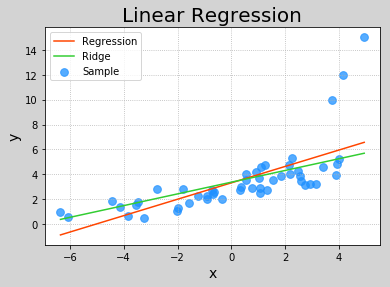

In [5]:
import sklearn.linear_model as lm
import numpy as np
import sklearn.metrics as sm   # 各种评价指标
import matplotlib.pyplot as plt
import pickle

filepath = './data/'
datafile = 'abnormal.txt'
modelfile = 'model_ln.pkl'
x, y = [], []
with open(filepath + datafile, 'r') as f:
    for line in f.readlines():
        data = [ float(substr) for substr in line.split(',') ]
        x.append(data[:-1])
        y.append(data[-1])
        
x = np.array(x)
y = np.array(y)
print(x.shape, y.shape)

# 普通线性回归
model_ln = lm.LinearRegression()            # 创建线性回归器
model_ln.fit(x, y)                          # 训练
pred_y_ln = model_ln.predict(x)             # 计算预测值

# 岭回归
model_rd = lm.Ridge(150, fit_intercept=True,
                    max_iter=10000)
            # 第一个参数是正则强度超参,为0则就是普通线性回归 让权重和偏置都受正则影响，默认是False，只对权重影响, max_iter最大迭代次数
model_rd.fit(x, y)
pred_y_rd = model_rd.predict(x)                # 计算预测值

plt.figure('Linear and Ridge Regression', facecolor='lightgray')
plt.title('Linear Regression', fontsize=20)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.tick_params(labelsize=10)
plt.grid(linestyle=':')
plt.scatter(x, y, c = "dodgerblue", alpha = 0.75, s = 60, label='Sample')

sorted_indices = x.T[0].argsort()
plt.plot(x[sorted_indices] , pred_y_ln[sorted_indices], c = 'orangered', label='Regression')  # 普通线性回归
plt.plot(x[sorted_indices] , pred_y_rd[sorted_indices], c = 'black', label='Ridge')       # 岭回归
plt.legend()
plt.show()